# This notebook plots the correlation matrix of the features in the dataset.
The notebook number will correlate with the correlation matrix notebook number. e.g. This is Notbook 3a. correlating with notebook 2a.

In [1]:
suppressWarnings(suppressMessages(library(ggplot2)))
suppressWarnings(suppressMessages(library(corrplot)))
suppressWarnings(suppressMessages(library(dplyr)))
suppressWarnings(suppressMessages(library(argparse)))
suppressWarnings(suppressMessages(library(RcppTOML)))

In [2]:
filepath <- file.path(getwd(), "utils" )
filename <- file.path(filepath, "params.toml")
p <- parseTOML(filename)
list_of_treatments <- c(p$list_of_treatments$treatments)


In [3]:
# set up parser
parser <- ArgumentParser()

# set up arguments
parser$add_argument("--cell_type", default="none",
    help="define the cell type"
    )
    
parser$add_argument("--level", default="none",
    help="defines the data level of aggregation"
    )

parser$add_argument("--group", default="none",
    help="defines the group to be used for correlation analysis"
    )

# parse arguments
args <- parser$parse_args()

# define vars from parsed args
cell_type = args$cell_type
level = args$level
group = args$group

ERROR: Error in "argparse::parse_args_output(output)": parse error:
usage: PROGRAM [-h] [--cell_type CELL_TYPE] [--level LEVEL] [--group GROUP]
PROGRAM: error: unrecognized arguments: /home/lippincm/.local/share/jupyter/runtime/kernel-v2-140118s9vYdUKMIPfZ.json


In [6]:
# temp code
cell_type = "SHSY5Y"
level = "nomic"
group = "wells"


if (group == "selected_treatments"){
    group = "treatments"
    filtered_option = TRUE
} else {
    filtered_option = FALSE
}


In [7]:
project_path = getwd()
filename = paste0(group,".csv")
corr_file = file.path(project_path, "results","correlation",cell_type,level,filename)
# read in csv file
df <- read.csv(corr_file)
# drop the first column
df <- df[,-1]

In [8]:
# set path of the plot
mainDir = project_path
figure_dir = file.path(mainDir, "Figures", "corrplot", cell_type, level)
# set path of the plot
if (file.exists(figure_dir, recursive = TRUE)){
    setwd(figure_dir)
} else {
    dir.create(figure_dir, recursive = TRUE)
    setwd(figure_dir)
}

In [9]:
# make list of treatments into a list 
list_of_treatments <- c(p$list_of_treatments$treatments)

In [10]:
if (filtered_option == TRUE){
    # drop values in first and second column that are not in list of treatments
    df <- df %>% rowwise() %>%
        filter(Treatments %in% list_of_treatments)
    df <- df %>% rowwise() %>%
        filter(oneb_Metadata_Treatment_Dose_Inhibitor_Dose %in% list_of_treatments)
} else {
    df <- df
}

In [11]:
figure_dir <- file.path(mainDir, "Figures", "corrplot", cell_type, level)
file <- paste0(group,".png")
file_path <- file.path(figure_dir, file)

title <- paste0("Correlation of ", group, " for ", cell_type, "\n for each ", level)

In [12]:
if (group == "wells"){
    X <- sym("Metadata_Well")
    Y <- sym("Wells")
} else {
    X <- sym("Treatments")
    Y <- sym("oneb_Metadata_Treatment_Dose_Inhibitor_Dose")
}

Saving 6.67 x 6.67 in image


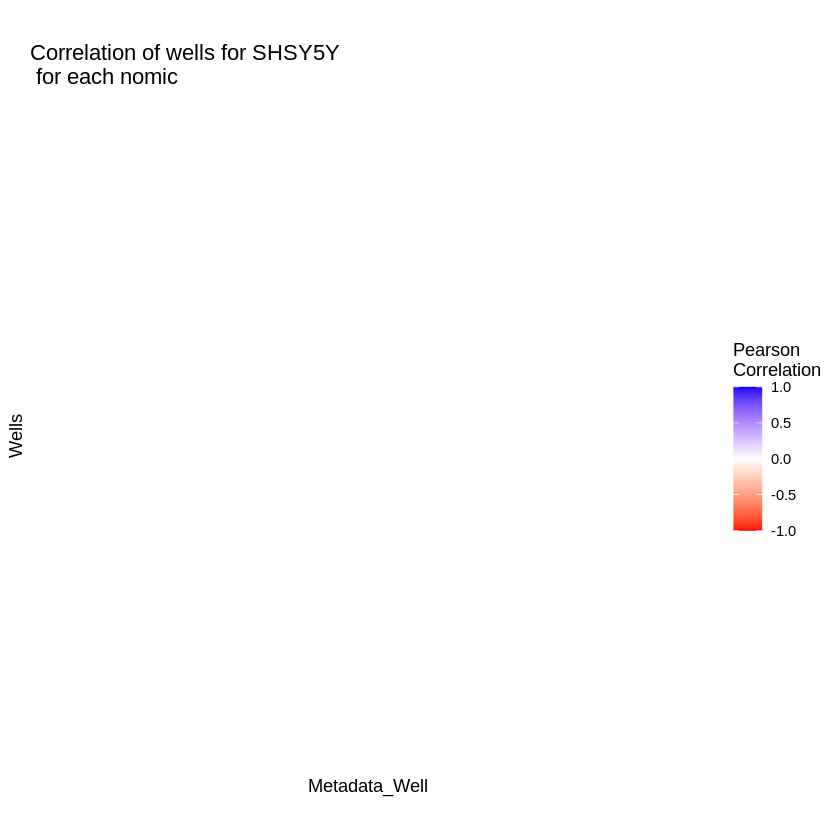

In [14]:
p <- ggplot(df, aes(x = !!X, y = !!Y)) +
    geom_tile(aes(fill = correlation)) +
    scale_fill_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, limit = c(-1,1), space = "Lab", name="Pearson\nCorrelation") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, size = 10, hjust = 1)) +
    coord_fixed()+
    ggtitle(title)

ggsave(file_path, p)
p